# Final Project Notebook

DS 5001 Exploratory Text Analytics | Spring 2024

# Metadata

- Full Name: Ji Hyun Kim
- Userid: (computing id) mqa4qu / (github id) kmjhyn
- GitHub Repo URL: https://github.com/kmjhyn/24Spring_ETA_Project.git
- UVA Box URL: https://virginia.box.com/s/84pl47ozfsggqgjvch5io0tekdzw51aw

# Overview

The goal of the final project is for you to create a **digital analytical edition** of a corpus using the tools, practices, and perspectives you’ve learning in this course. You will select a corpus that has already been digitized and transcribed, parse that into an F-compliant set of tables, and then generate and visualize the results of a series of fitted models. You will also draw some tentative conclusions regarding the linguistic, cultural, psychological, or historical features represented by your corpus. The point of the exercise is to have you work with a corpus through the entire pipeline from ingestion to interpretation. 

Specifically, you will acquire a collection of long-form texts and perform the following operations:

- **Convert** the collection from their source formats (F0) into a set of tables that conform to the Standard Text Analytic Data Model (F2).
- **Annotate** these tables with statistical and linguistic features using NLP libraries such as NLTK (F3).
- **Produce** a vector representation of the corpus to generate TFIDF values to add to the TOKEN (aka CORPUS) and VOCAB tables (F4).
- **Model** the annotated and vectorized model with tables and features derived from the application of unsupervised methods, including PCA, LDA, and word2vec (F5).
- **Explore** your results using statistical and visual methods.
- **Present** conclusions about patterns observed in the corpus by means of these operations.

When you are finished, you will make the results of your work available in GitHub (for code) and UVA Box (for data). You will submit to Gradescope (via Canvas) a PDF version of a Jupyter notebook that contains the information listed below.

# Some Details

- Please fill out your answers in each task below by editing the markdown cell. 
- Replace text that asks you to insert something with the thing, i.e. replace `(INSERT IMAGE HERE)` with an image element, e.g. `![](image.png)`.
- For URLs, just paste the raw URL directly into the text area. Don't worry about providing link labels using `[label](link)`.
- Please do not alter the structure of the document or cell, i.e. the bulleted lists. 
- You may add explanatory paragraphs below the bulleted lists.
- Please name your tables as they are named in each task below.
- Tasks are indicated by headers with point values in parentheses.

# Raw Data

## Source Description (1)

Provide a brief description of your source material, including its provenance and content. Tell us where you found it and what kind of content it contains.

  > The source material I used for this project are movie scripts. The scripts I chose are the *Starwars Series*, which is consisted of 6 independent movies directed and mainly written by *George Lucas*. These scripts were available from [The Internet Movie Script Database (IMSDb)](https://imsdb.com/), and can be used freely for educational purposes. The scripts I parsed and used for analysis are as below:\
  >     - Star Wars - Episode I - The Phantom Menace (1999)\
  >     - Star Wars- Episode II - Attack of the Clones (2002)\
  >     - Star Wars- Episode III - Revenge of the Sith (2005)\
  >     - Star Wars - Episode IV - A New Hope (1977)\
  >     - Star Wars- Episode V - The Empire Strikes Back (1980)\
  >     - Star Wars- Episode VI - Return of the Jedi (1983) 

## Source Features (1)

Add values for the following items. (Do this for all following bulleted lists.)
- Source URL: **url linked to each episode**
>  - [Star Wars - Episode I - The Phantom Menace (1999)](https://imsdb.com/Movie%20Scripts/Star%20Wars:%20The%20Phantom%20Menace%20Script.html)
>  - [Star Wars- Episode II - Attack of the Clones (2002)](https://imsdb.com/Movie%20Scripts/Star%20Wars:%20Attack%20of%20the%20Clones%20Script.html)
>  - [Star Wars- Episode III - Revenge of the Sith (2005)](https://imsdb.com/Movie%20Scripts/Star%20Wars:%20Revenge%20of%20the%20Sith%20Script.html)
>  - [Star Wars - Episode IV - A New Hope (1977)](https://imsdb.com/Movie%20Scripts/Star%20Wars:%20A%20New%20Hope%20Script.html)
>  - [Star Wars- Episode V - The Empire Strikes Back (1980)](https://imsdb.com/Movie%20Scripts/Star%20Wars:%20The%20Empire%20Strikes%20Back%20Script.html)
>  - [Star Wars- Episode VI - Return of the Jedi (1983)](https://imsdb.com/Movie%20Scripts/Star%20Wars:%20Return%20of%20the%20Jedi%20Script.html)
- UVA Box URL: **https://virginia.box.com/s/34245o0benf39xna21ubrr56kp0pewbr**
- Number of raw documents: **6 documents**
- Total size of raw documents (e.g. in MB): **1017.5 KB**
- File format(s), e.g. XML, plaintext, etc.: **rtf**

## Source Document Structure (1)

Provide a brief description of the internal structure of each document. That, describe the typical elements found in document and their relation to each other. For example, a corpus of letters might be described as having a date, an addressee, a salutation, a set of content paragraphs, and closing. If they are various structures, state that.

> *Examples on how I explored these dataset and the top 5 characters for each episode is on [0. Data Exploration notebook](https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/A.%20Data%20Exploration.ipynb)*
>
>  
> **Basic Structure**\
> Scripts are consisted of largely 3 parts, the beginning rollup content, lines for characters, and descriptions. Below is a more specific explanation on how these were structured by episodes.
> 
> **1. Rollup Content**
>    - The subtitles that rollup in the beginning of every star wars movie is written on the beginning of every scripts.
>    - Before the actual content, the formatting of the beginning text is written, which are excluded while processing.
>    
> **2. Dialogues**\
> Dialogues starts with a character name and their lines. Different scripts have different way of how it is formatted, in a way that are differentiated by how much they are tabbed or written in full caps.
>    - Episode I
>       - Character name tabbed twice, in caps
>       - Lines tabbed once
>       - e.g., *(tab)(tab)QUI-GON(linebreak)(tab)I don't sense anything.(linebreak)*
>    - Episode II
>       - Character name tabbed twice, in caps
>       - Lines tabbed once
>       - e.g., *(tab)(tab)PALPATINE(linebreak)(tab)No! I will not let that happen!(linebreak)*
>    - Episode III
>       - Character names not tabbed, in caps
>       - Lines followed after character names and a colon
>       - e.g., *OBI-WAN: Break right and go high.*
>    - Episode IV
>       - Character names not tabbed, in caps
>       - Lines followed after character names and a colon
>       - e.g., *LUKE: But there was a lot of firing earlier*
>    - Episode V
>       - Character name tabbed four times, in caps
>       - Lines tabbed twice
>       - e.g., *(tab)(tab)(tab)(tab)RIEEKAN(linebreak)(tab)(tab)I'm sorry to hear that.(linebreak)*
>    - Episode VI
>       - Character name tabbed twice, in caps
>       - Lines tabbed once
>       - e.g., *(tab)(tab)JERJERROD(linebreak)(tab)We shall double our efforts.(linebreak)*
>       
> **3. Descriptions**\
> Descriptive part describes the place and settings of the background of the scene, guides how the actors to act and move, and how the camera moves or pans.
>    - Episode I
>       - In caps, not tabbed
>       - Define interior(INT.) or exterior(EXT.), broader space, and a more specific space if needed.
>       - e.g., *INT. REPUBLIC CRUISER - COCKPIT - DOCKING BAY*
>    - Episode II
>       - In caps, not tabbed
>       - Define interior(INT.) or exterior(EXT.), space, time (DAY or NIGHT).
>       - e.g., *INT. CHANCELLOR'S OFFICE - DAY*
>    - Episode III
>       - In caps, not tabbed
>       - Define scene number, interior(INT.) or exterior(EXT.), broader space, and a more specific space if needed.
>       - e.g., *13 INT. VENT SHAFT-TRADE FEDERATION CRUISER*
>    - Episode IV
>       - In caps, not tabbed, but following specific descriptions are tabbed
>       - define interior or exterior, space
>       - e.g., *INTERIOR: LARS HOMESTEAD -- DINING AREA*
>    - Episode V
>       - In caps, not tabbed
>       - Define interior(INT.) or exterior(EXT.), space, a more specific space if needed, time (DAY or NIGHT).
>       - e.g., *EXT. HOTH - SNOWDRIFT - DAWN*
>    - Episode VI
>       - In caps, not tabbed in the beginning or end, but tabbed inside
>       - Define scene number, interior(INT.) or exterior(EXT.), broader space, and a more specific space if needed, scene number.
>       - e.g., *11(tab)INT JABBA'S THRONE ROOM(tab)(tab)(tab)(tab)11*
>     
> **4. Other Structure**
>    - Movie related factors provided in bracets e.g., (laughs)
>    - If the dialogue is not english, subtitles are printed in bracets with indication as (SUBTITLED) in the beginning
>    - (O.S.) printed in the beginning indicating 'off-screen' where actors are present in the same scene but are not filmed on screen

# Parsed and Annotated Data

Parse the raw data into the three core tables of your addition: the `LIB`, `CORPUS`, and `VOCAB` tables.

These tables will be stored as CSV files with header rows.

You may consider using `|` as a delimitter.

Provide the following information for each.

## LIB (2)

The source documents the corpus comprises. These may be books, plays, newspaper articles, abstracts, blog posts, etc. 

Note that these are *not* documents in the sense used to describe a bag-of-words representation of a text, e.g. chapter.

- UVA Box URL: https://virginia.box.com/s/pcftf1ttyng24nhtofmqpen5m1l2x7y4
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/C.%20LIB.ipynb
- Delimitter: `,`
- Number of observations: **6 rows (6 books)**
- List of features, including at least three that may be used for model summarization (e.g. date, author, etc.):
>    - year
>    - episode
>    - movie_title
>    - chap_regex
>    - source_file_path
>    - reviews
>    - writer
>    - character_len
>    - runtime
- Average length of each document in characters: **173,644.5**
>    - episode 1: 174,327
>    - episode 2: 166,248
>    - episode 3: 177,188
>    - episode 4: 204,053
>    - episode 5: 172,933
>    - episode 6: 147,118

## CORPUS (2)

The sequence of word tokens in the corpus, indexed by their location in the corpus and document structures.

- UVA Box URL: https://virginia.box.com/s/z2vejgt3jnsj4s20midxhq1b83xxod28
- GitHub URL for notebook used to create:
>    - **https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/B.%20Basic%20Processing.ipynb**\
>      On B. Processing notebook, I parsed the text into different OHCO levels by each episode
  >    - **https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/D.%20Corpus.ipynb**\
  >      On D. Corpus notebook, I combined each of the token files making the entire corpus and adding necessary columns 
- Delimitter: `,`
- Number of observations Between (should be >= 500,000 and <= 2,000,000 observations.): **174,838**
- OHCO Structure (as delimitted column names):
>    - movie_id: 6 different episodes
>    - chap_num: for each scenes
>    - para_num: for each character's dialogue (everytime different character speaks, it is considered a different paragraph)
>    - sent_num: each sentence regardless of which character speaks
>    - token_num: each token
- Columns (as delimitted column names, including `token_str`, `term_str`, `pos`, and `pos_group`):
>    - token_str
>    - term_str
>    - pos_tags
>    - pos
>    - pos_group

## VOCAB (2)

The unique word types (terms) in the corpus.

- UVA Box URL: https://virginia.box.com/s/2xcwiv2nm36x7g44zm7tc6unpl8kpzmt
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/E.%20Vocab.ipynb
- Delimitter: `,`
- Number of observations: **9602**
- Columns (as delimitted names, including `n`, `p`', `i`, `dfidf`, `porter_stem`, `max_pos` and `max_pos_group`, `stop`):
>    - n
>    - p
>    - i
>    - n_chars
>    - n_tokens
>    - max_pos_group
>    - max_pos
>    - stop
>    - stem_porter
>    - stem_snowball
>    - stem_lancaster
>    - dfidf
>    - df
>    - idf
>    - mean_tfidf
>    - dp
>    - di
>    - dh
>    - n2
>    - p2
>    - i2
- Note: Your VOCAB may contain ngrams. If so, add a feature for `ngram_length`.
- List the top 20 significant words in the corpus by DFIDF.
>    1. it
>    2. as
>    3. he
>    4. i
>    5. you
>    6. his
>    7. at
>    8. into
>    9. with
>    10. out
>    11. are
>    12. on
>    13. is
>    14. for
>    15. they
>    16. up
>    17. from
>    18. we
>    19. by
>    20. that    

# Derived Tables

## BOW (3)

A bag-of-words representation of the CORPUS.

- UVA Box URL: https://virginia.box.com/s/aqdats3n87ebe2h0fvsyem7qq0npyn80
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/E.%20Vocab.ipynb
- Delimitter: `,`
- Bag (expressed in terms of OHCO levels): **Chapter** (OHCO :2)
- Number of observations: **100,495**
- Columns (as delimitted names, including `n`, `tfidf`): **n, tfidf**

## DTM (3)

A represenation of the BOW as a sparse count matrix.

- UVA Box URL:
>  - DTM: https://virginia.box.com/s/w5gtp9s6hv035u7y9r9l8lp4xgmbm8jf
>  - DTCM: https://virginia.box.com/s/37buqdcvx06tjc3r5g59uauj42aoku4a
- UVA Box URL of BOW used to generate (if applicable): https://virginia.box.com/s/aqdats3n87ebe2h0fvsyem7qq0npyn80
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/E.%20Vocab.ipynb
- Delimitter: `,`
- Bag (expressed in terms of OHCO levels): **Chapter** (OHCO :2)

## TFIDF (3)

A Document-Term matrix with TFIDF values.

- UVA Box URL: https://virginia.box.com/s/ldppdihvo4s491y53knxb3spfghrdp0c
- UVA Box URL of DTM or BOW used to create: (I used DTCM instead) https://virginia.box.com/s/37buqdcvx06tjc3r5g59uauj42aoku4a
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/E.%20Vocab.ipynb
- Delimitter: `,`
- Description of TFIDIF formula ($\LaTeX$ OK):
>    tf_method='max'

  >    when $f_t,d$ is the frequency of term $t$ in document $d$
 
  >    $TF_{t,d} = \frac{f_{t,d}}{\max_{t' \in d} f_{t',d}}$
  
  >    $IDF_t = \log_2\left(\frac{N}{df_t}\right)\$
  
  >    $TFIDF_{t,d} = TF_{t,d} \times IDF_t$

## Reduced and Normalized TFIDF_L2 (3)

A Document-Term matrix with L2 normalized TFIDF values.

- UVA Box URL:
> - top 5,000 words based on dh: https://virginia.box.com/s/t93exqmcxkqtb37864ki1t4i8qrmldwm
> - top 5,000 nouns, verbs, adjectives based on dfidf: https://virginia.box.com/s/yimeqyt9bmcxji2o3yhzzrf32pgflxep
- UVA Box URL of source TFIDF table: https://virginia.box.com/s/ldppdihvo4s491y53knxb3spfghrdp0c
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/E.%20Vocab.ipynb
- Delimitter: `,`
- Number of features (i.e. significant words): **5000 (1469 rows × 5000 columns)**
- Principle of significant word selection:
> I tried 2 different ways to select significant words 1) using "dh" and 2) using "dfidf" and pos as nouns, verbs, and adjectives.
> - **dh** from VOCAB table, estimates the entropy of terms over documents.
>    - It is calculated by **dp (document frequency proportion: number of documents in which the term appears) * di(document informativeness of each term: lower dp will have higher di values, higher informativeness)**
>    - Therefore, **dh(document entropy)** is measuring terms weighted informativeness on the entire corpus, calculating the amount of information each term gives based on both frequency and distribution across the documents.
> - **tfidf**
>    - first selected words that are **nouns, verbs, and adjectives, except for Proper nouns** (max_pos = NN, VB, JJ, not NNP)
>    - then sorted top 5,000 words using dfidf
>    
>\
>  **I mainly used the second version (dfidf) for the following parts**

# Models

## PCA Components (4)

- UVA Box URL: https://virginia.box.com/s/8ea51qhhiy0hs96575bk6jdk8pr8w8db
- UVA Box URL of the source TFIDF_L2 table: https://virginia.box.com/s/yimeqyt9bmcxji2o3yhzzrf32pgflxep
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/G.%20PCA.ipynb
- Delimitter: `,`
- Number of components: **10 components**
- Library used to generate: Pandas, NumPy, and SciPy (did not use pca_engine)
- Top 5 positive terms for first component: **star, death, red, leader, wing**
- Top 5 negative terms for second component: **i, jedi, t, is, have** (the t seems to be indicating the types of x-wing fighters such as t-14 and t-65)

> Tried filtering only the Nouns, however, since star wars terms' POS aren't very clearly defined with nltk, several NNPS that are not well classified showed up as NN, acting as significant terms\
> Therefore I did not filter out only the nouns, rather used nouns, verbs, adjectives

## PCA DCM (4)

The document-component matrix generated.

- UVA Box URL: https://virginia.box.com/s/xgg6k8biblqfgm5irx6783yv3msxvrt1
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/G.%20PCA.ipynb
- Delimitter: `,`

## PCA Loadings (4)

The component-term matrix generated.

- UVA Box URL: https://virginia.box.com/s/1irw1pas9k6ko9qr5z2awd0kfvlgogyc
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/G.%20PCA.ipynb
- Delimitter: `,`

## PCA Visualization 1 (4)

Include a scatterplot of documents in the space created by the first two components.

Color the points based on a metadata feature associated with the documents.

Also include a scatterplot of the loadings for the same two components. (This does not need a feature mapped onto color.)

**PC 0&1**
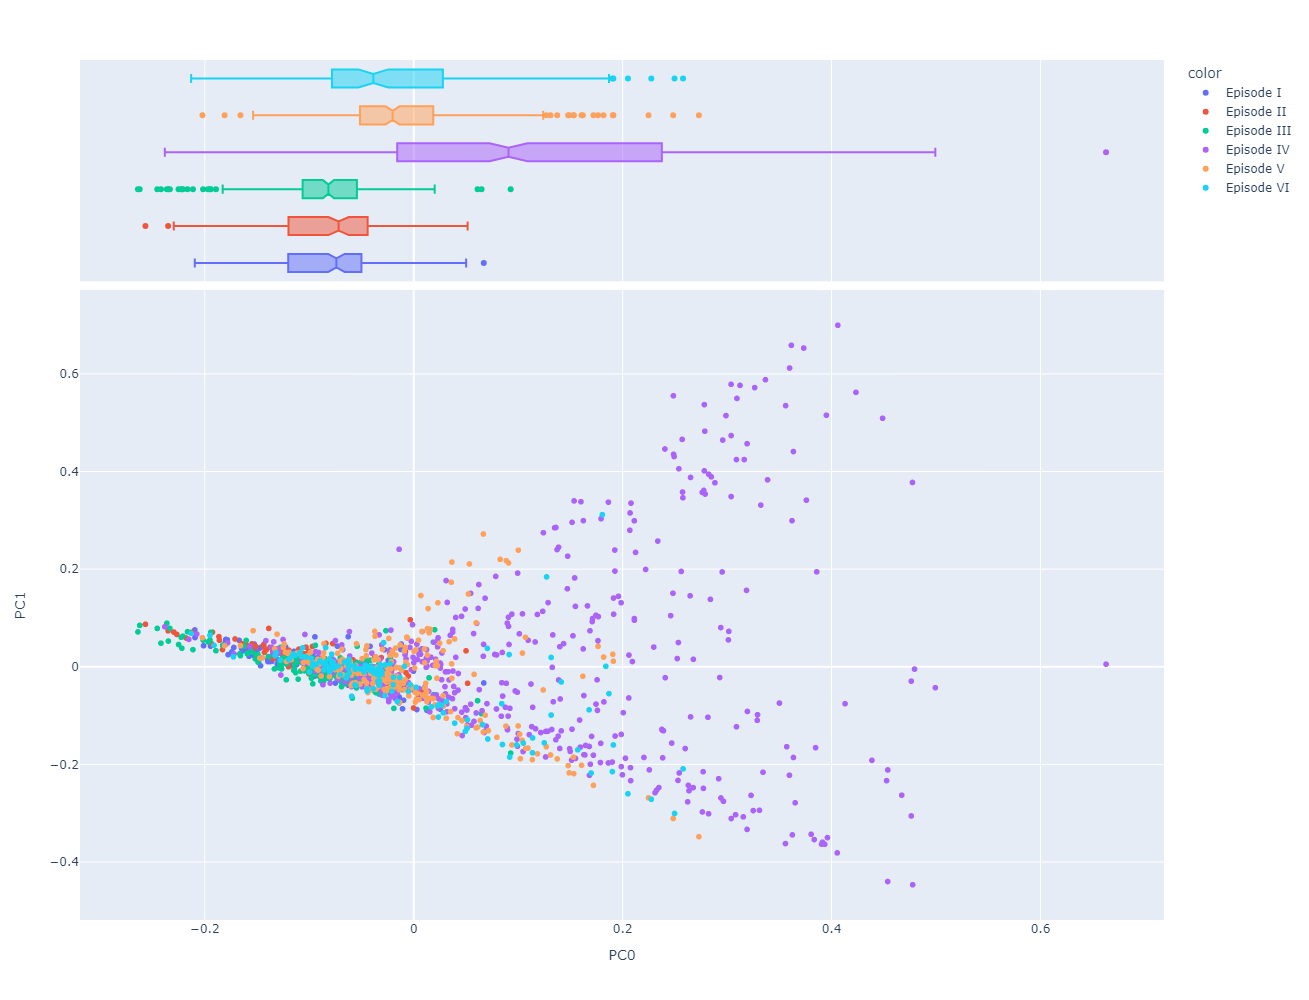
**LOADING 0&1**
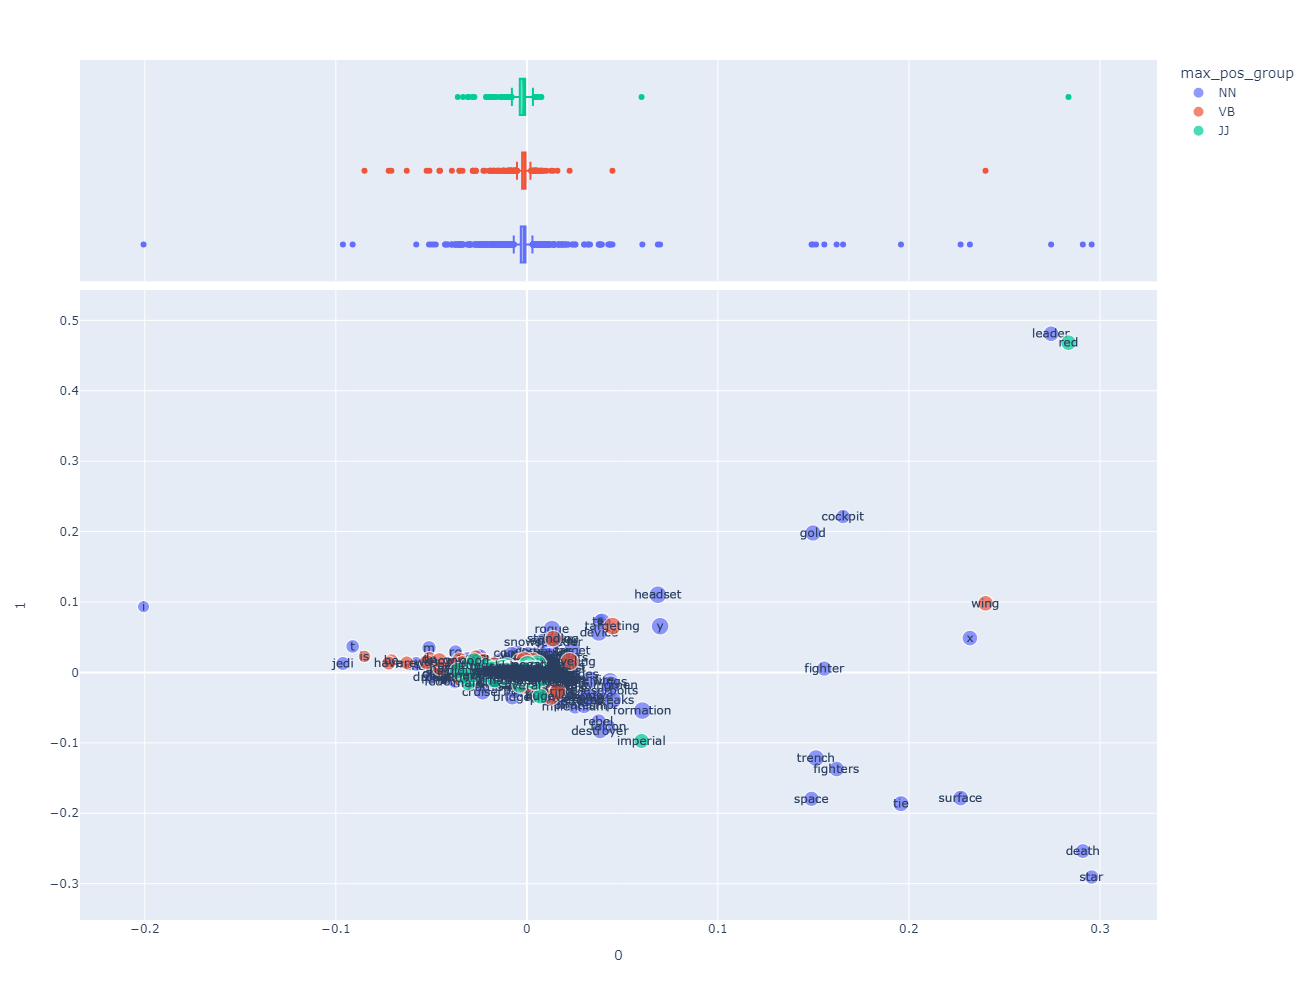


Briefly describe the nature of the polarity you see in the first component:
> - Based on PC plotting in the first two components, the distictive characteristics are that **1) largest variance in episode 4** and **2) variance larger in 4,5,6 than 1,2,3**.
>   - Episode 4 might have the largest variance as it is the first Star Wars movie to be introduced to the public. It would have needed to introduce the audience about the complex settings and diverse background information including vast planets, species, and their characteristics. Along with this introduction, the movie tries to keep the narrative interesting with its classic battle scenes between the evil and the good.
>   - In a similar way, the following classic episodes that were filmed after would have tried to expand the complex relationships and further details about the Star Wars universe. While the character development leads to the famous line 'I am your father' in episode 5 and finalizing the long war with the change in Darth Vader's character, the main characters of the rebels keep on moving their locations trying to get away from the imperials or to get stronger by training or making more alliances. This development and narratives could have been captured in the PCA plot as larger variance. On the other hand episode 1 through 3 has a more overarching theme, the story of Anakin Skywalker, from how he was considered as the Chosen One to bring balance to the Force until he transforms into Darth Vader. Since episode 1-3 has a more specific storyline for one character than the continuous war and efforts of the rebellions on episode 4-6, it might have resulted in less variance.

> - Loading plot
>   - 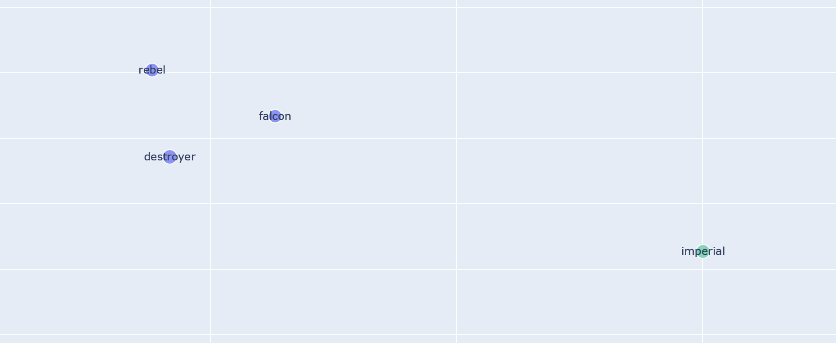
>   - On the right part of one cluster, you could see words including **rebel, destroyer, falcon,** and **imperial**. It seems that there are two opposite concepts that were dealt together in context, as **rebel vs imperial** and **falcon vs the destroyer**.
>   - 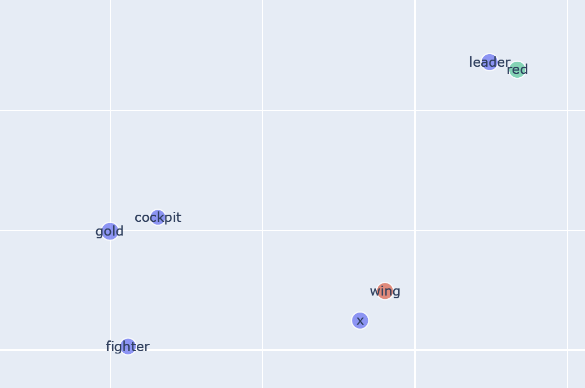
>   - On the right top cluster, you could see **leader, red, gold, cockpit, x, wing,** and **fighter** put together. The red leader and the gold leader are both pilots that commands each squads, who flew in x-wing cockpits as fighters as the Rebel Alliance.

## PCA Visualization 2 (4)

Include a scatterplot of documents in the space created by the second two components.

Color the points based on a metadata feature associated with the documents.

Also include a scatterplot of the loadings for the same two components. (This does not need a feature mapped onto color.)

**PC 2&3**
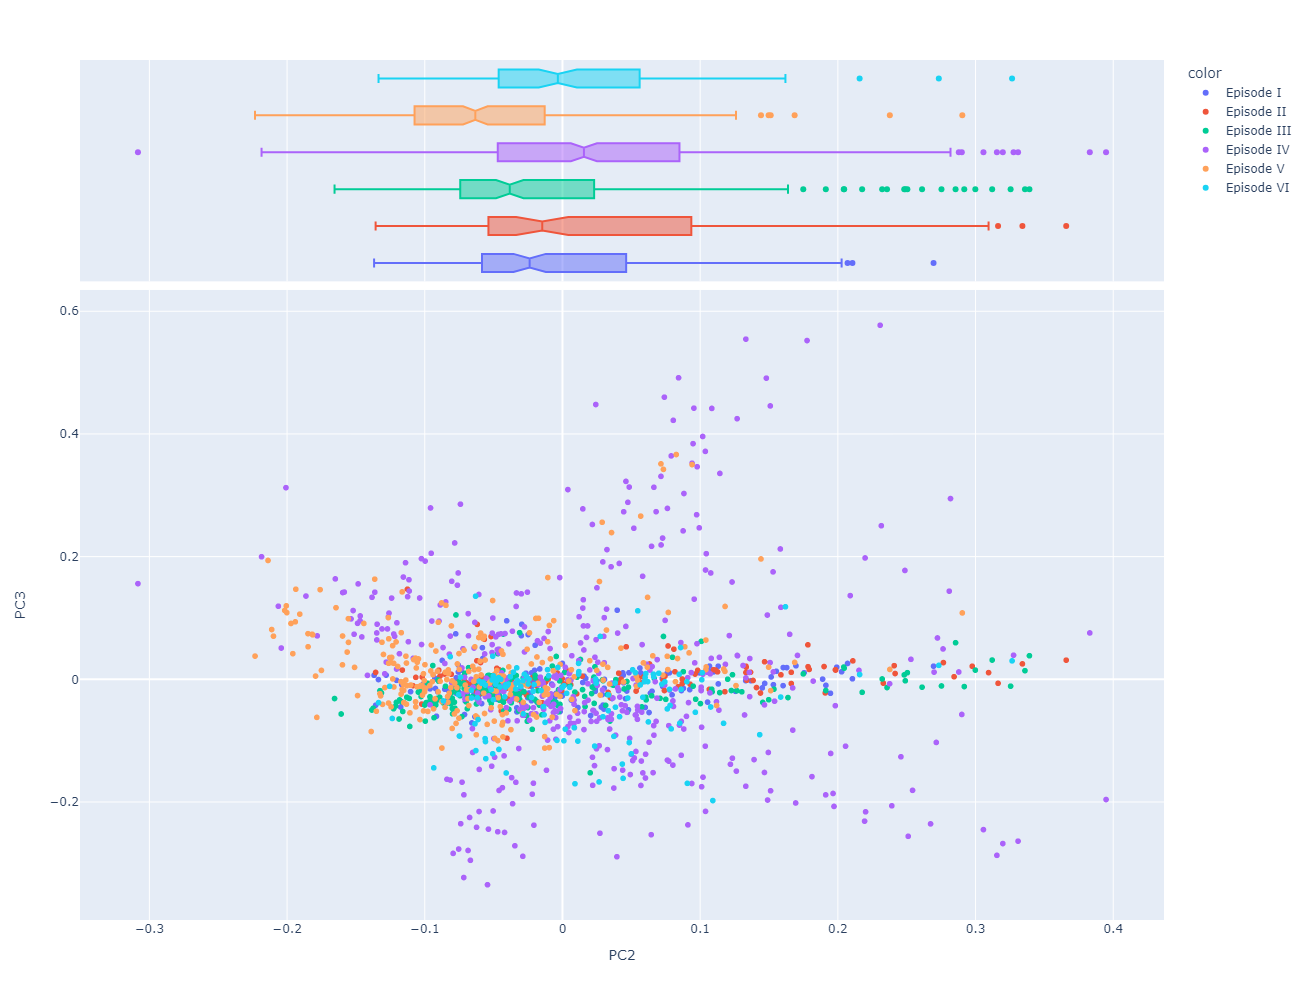
**Loading 2&3**
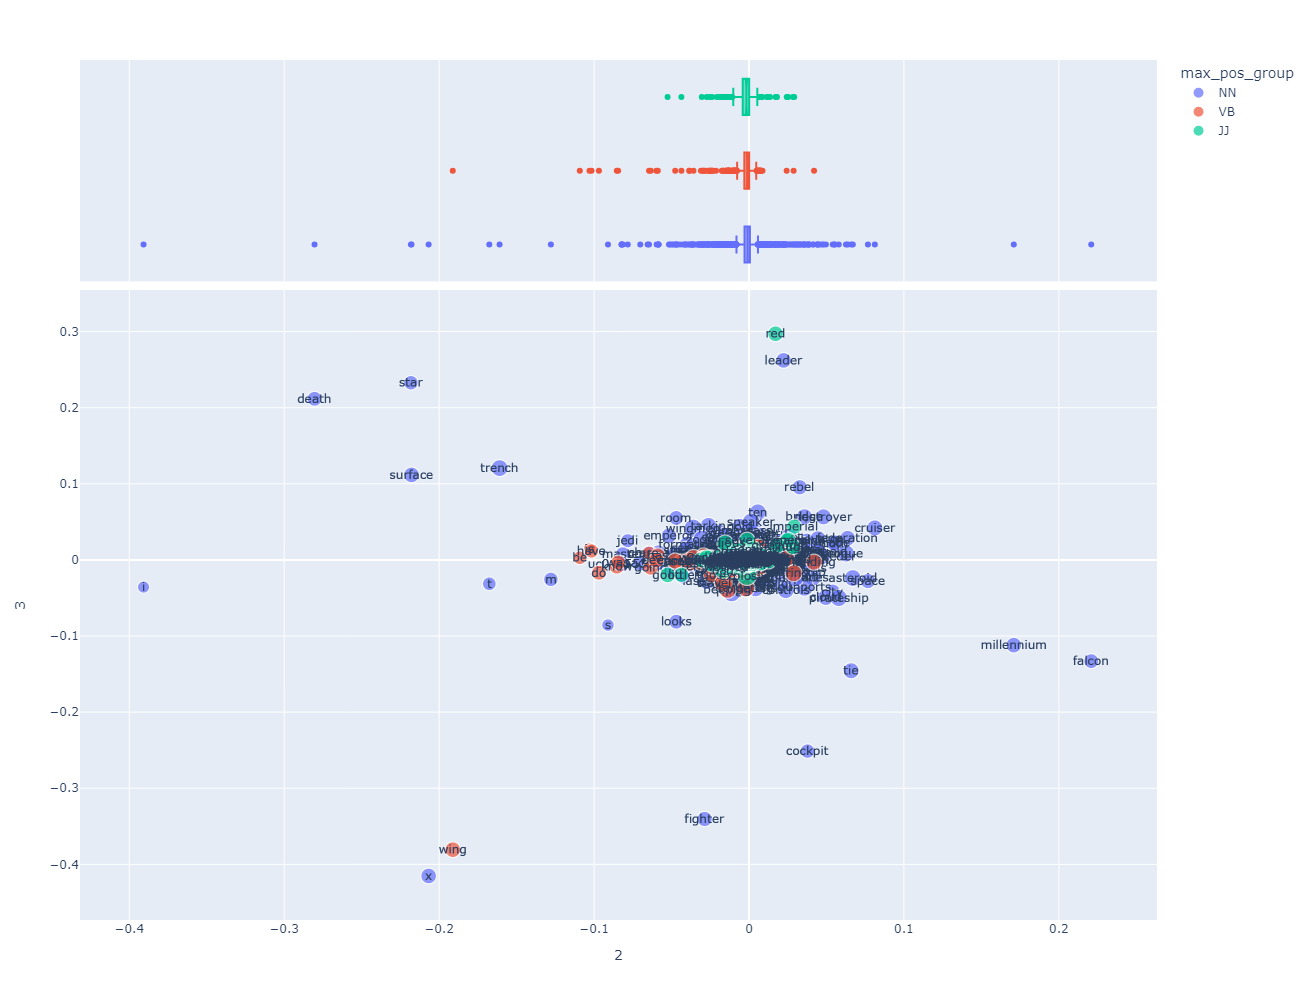


Briefly describe the nature of the polarity you see in the second two components:
> - The distribution across PC2 and PC3 is **less distinct** compared to the first two principal component analysis.
>    - Although the variation is still the largest in episode 4, variations of episode 1-3 has significantly increased, making a considerable amount to overlap.
>    - This could be due to the fact that the second two components convey a more subtle, less dominant aspects, capturing an underlying nuiance of the movies. Therefore, this can be considered that the episodes have its independent and complex storylines, however, shares a common storyline that overarches the whole 6 movies.

> - Loading plot
>    - 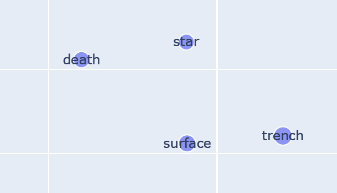
>    - On the left top cluster the words **death, star, surface**, and **trench** is clustered together. Death star was the Empire's ulitmate weapon, and the surafaces that is consisted of numerous bombs and the trench acting as directional marks for pilots are all terms that can describe the death star. This was also similarly clustered in the right bottom part from PC0 & PC1, which can indicate that these terms are pervasive throughout the corpus.
>    - 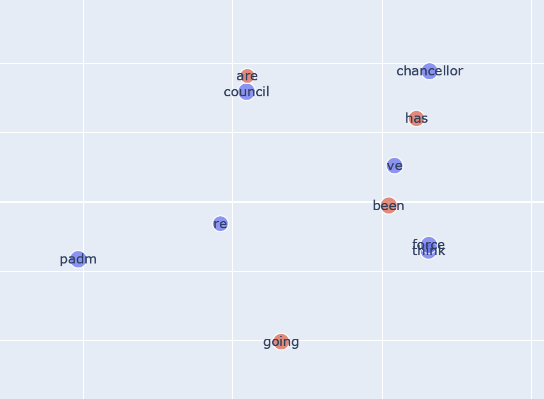
>    - On the part closer to the center, this cluster has **chancellor, force, think, council, padm(e), has, been**, and **going**. Mainly due to the key figures such as chancellor, council, and padme, and the words like 'has been going', it is likey that this cluster is representing leaders' discussion on the current status or a narrative element on the leaders makng strategic decisions.

## LDA TOPIC (4)

- UVA Box URL: https://virginia.box.com/s/pk6miadekpd2sgo801lsygadz95tjc3a
- UVA Box URL of count matrix used to create: https://virginia.box.com/s/n70fhcevcqm551bi9anjtedwyjmxp3r1
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/H.%20LDA.ipynb
- Delimitter: `,`
- Libary used to compute: **sklearn.decomposition LatentDirichletAllocation**
- A description of any filtering, e.g. POS (Nouns and Verbs only): **Nouns and Proper Nouns(r'^NNS?$'), exclude scene change indicators('int', 'ext', 'interior', 'exterior')**
- Number of components: **20 topics**
- Any other parameters used:
>    - max_features=4000
>    - stop_words='english'
>    - lda_max_iter = 5
>    - lda_n_top_terms = 7
>    - learning_offset=50
- Top 5 words and best-guess labels for topic five topics by mean document weight:
>  - T00: star, death, space, fighters, tie - **space battles**
>  - T01: jedi, master, force, council, dark - **jedi order and force**
>  - T02: droids, droid, battle, ship, door - **droid fight scenes**
>  - T03: panaka, capt, owen, droid, ship - **characters**
>  - T04: cockpit, falcon, ship, millennium, naboo - **iconic starships**

## LDA THETA (4)

- UVA Box URL: https://virginia.box.com/s/h0hio4bnu1sb7q2e5ryslie989y1jjxh
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/H.%20LDA.ipynb
- Delimitter: `,`

## LDA PHI (4)

- UVA Box URL: https://virginia.box.com/s/qsahez0zb8by99j9p4oe36q301rgkj3v
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/H.%20LDA.ipynb
- Delimitter: `,`

## LDA + PCA Visualization (4)

Apply PCA to the PHI table and plot the topics in the space opened by the first two components.

Size the points based on the mean document weight of each topic (using the THETA table).

Color the points basd on a metadata feature from the LIB table.

Provide a brief interpretation of what you see.

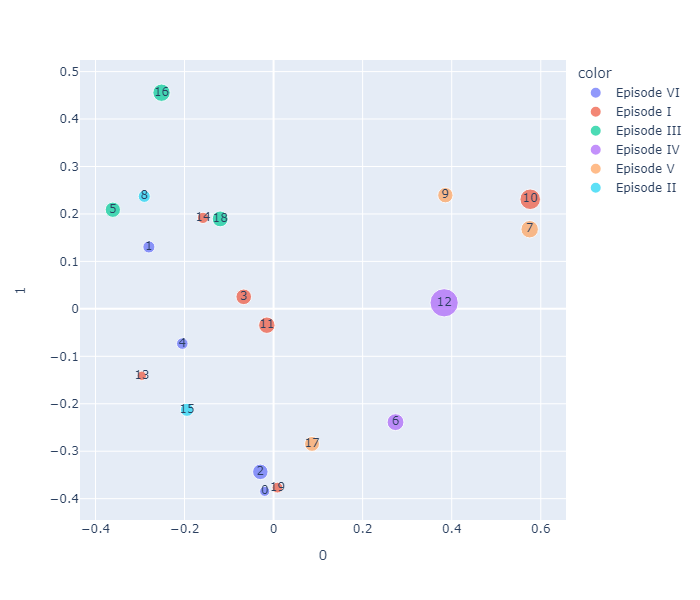

> - **Clusters**:
>    - T05, T16, T18 all from episode 3, clusters towards the top left part of the plot, indicating that there is a similarity in themes of the topics of this episode, possibly having unique topics in this episode that differs from others
>       - T05 : *jedi* master force council dark chancellor father
>       - T16 : *jedi* cruiser jango federation elevator trade count
>       - T18 : bail organa *jedi* clone piett commander platform
>    - T09, T07, T10 might share a similar topic, **spaceships**
>       - T09 : *falcon* city *ship* naboo *millennium* cloud day
>       - T07 : *leader* *cockpit* comlink rogue asteroid snowspeeder looks
>       - T10 : *cockpit falcon* *ship* *millennium* naboo looks window

> - **By episode**:
>    - Episode 4 appears to have topics that are more *centrally located* and has the *largest document weight*, possibly indicating its foundational role in the "Star Wars" series with more *general themes* within the episode that relates to other episodes.
>       - T12: *star death* space *fighters* tie *rebel* surface

## Sentiment VOCAB_SENT (4)

Sentiment values associated with a subset of the VOCAB from a curated sentiment lexicon.

- UVA Box URL: https://virginia.box.com/s/0nfjjh16bkzzk63w10q24ptdeh9rtkje
- UVA Box URL for source lexicon: https://virginia.box.com/s/vhyryhj2kxlwubb4rbugz3smavo5uidd
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/I.%20Sentiment.ipynb
- Delimitter: `,`

## Sentiment BOW_SENT (4)

Sentiment values from VOCAB_SENT mapped onto BOW.

- UVA Box URL: https://virginia.box.com/s/t3sk5b0ns4p7622p5d4ihpzlihdzw5x0
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/I.%20Sentiment.ipynb
- Delimitter: `,`

## Sentiment DOC_SENT (4)

Computed sentiment per bag computed from BOW_SENT.

- UVA Box URL: https://virginia.box.com/s/c2p4gkygju9d011y622lcv4bv2b2bpri
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/I.%20Sentiment.ipynb
- Delimitter: `,`
- Document bag expressed in terms of OHCO levels:  **Chapter** (OHCO :2)

## Sentiment Plot (4)

Plot sentiment over some metric space, such as time.

If you don't have a metric metadata features, plot sentiment over a feature of your choice.

You may use a bar chart or a line graph.


**1. Barplot**\
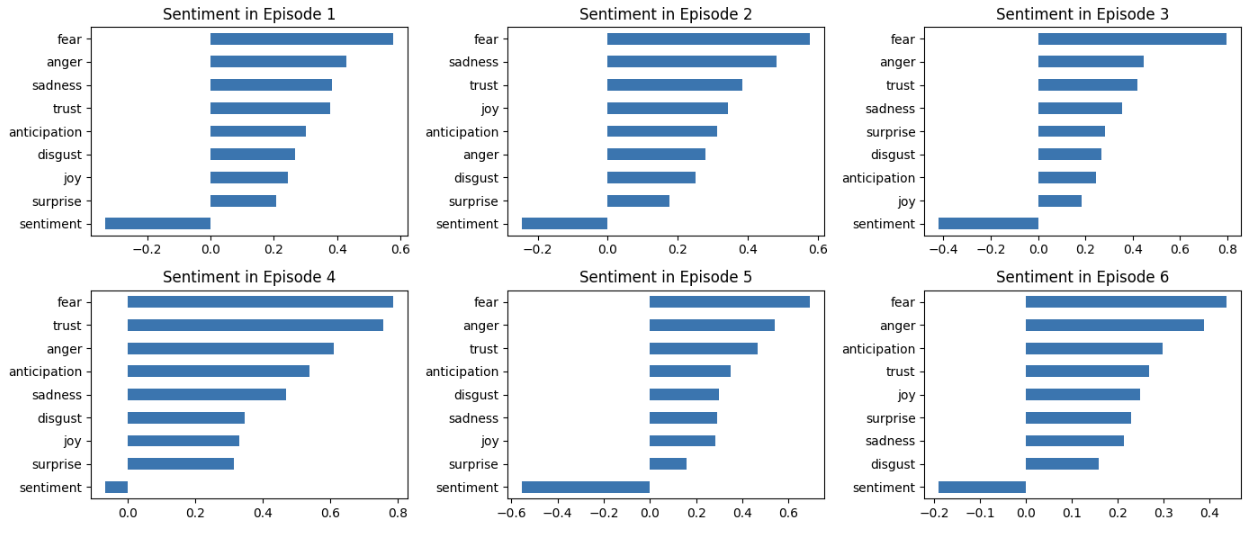
- 
> All episodes have the highest sentiment as fear mostly followed by anger.
> However episode 2 sentiment is shown in the order of sadness > trust > joy, which might indicate the scenes of romance between Anakin and Padme. Episode 4 also has relatively higher trust than the other sentiment, due to the possibility of the emerge of new hero, Luke Skywalker and his power.
 
**2. Line graph**
> In general, episode 1-3 are more stable in the sentiment line graphs, meaning there is less changes, whereas episode 4-6 are more changing with spikes.

-
**Episode 1**:\
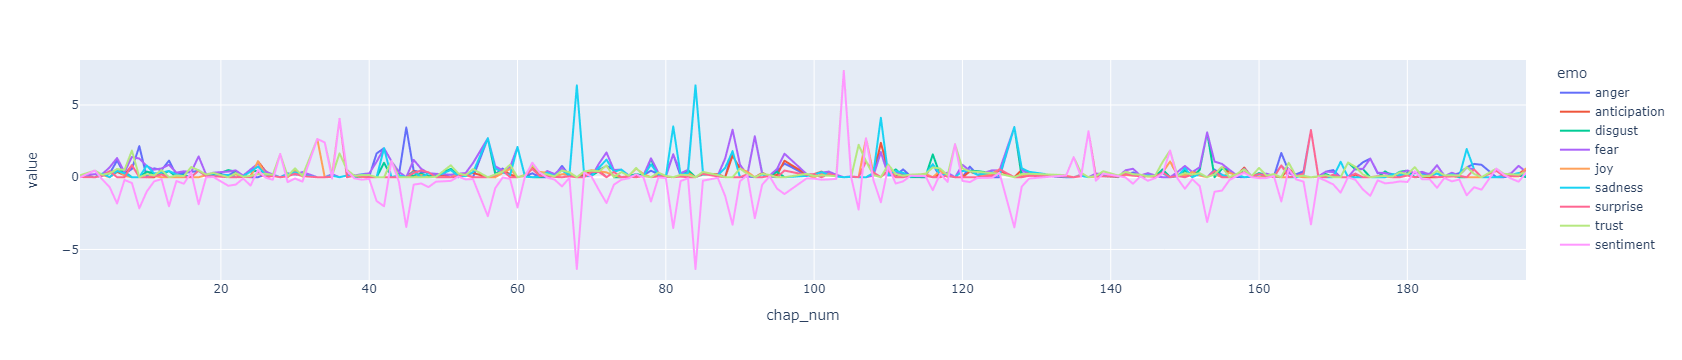

> While not much sentiment is shown in the beginning, a little after chapter 60 shows a spike on disgust and the sentiment changes highly for a while.

**Episode 2**:\
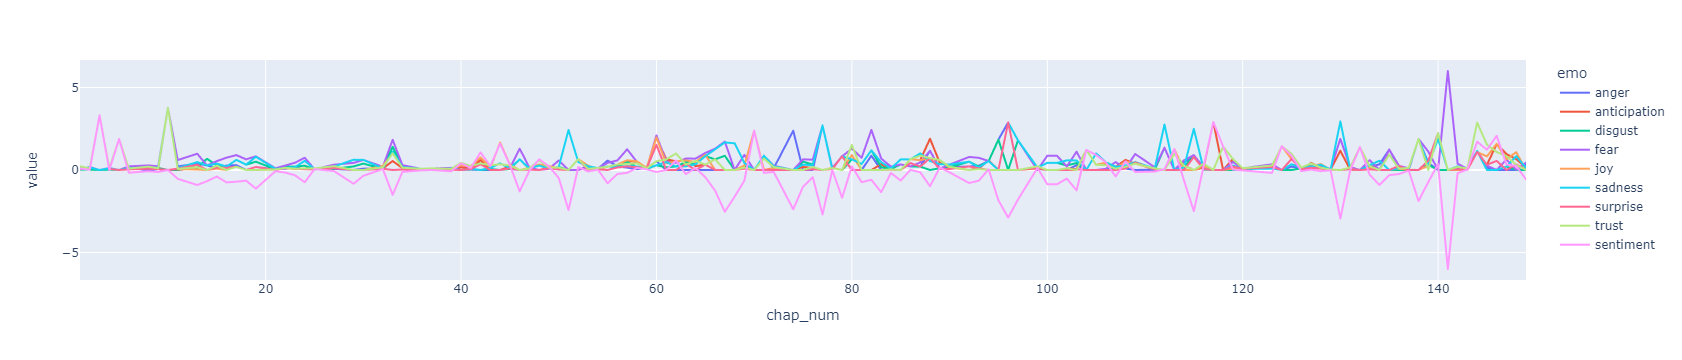
> This episode shows even less sentiment changes in the beginning, but a large spike of fear happens in the very end of the movie.

**Episode 3**:\
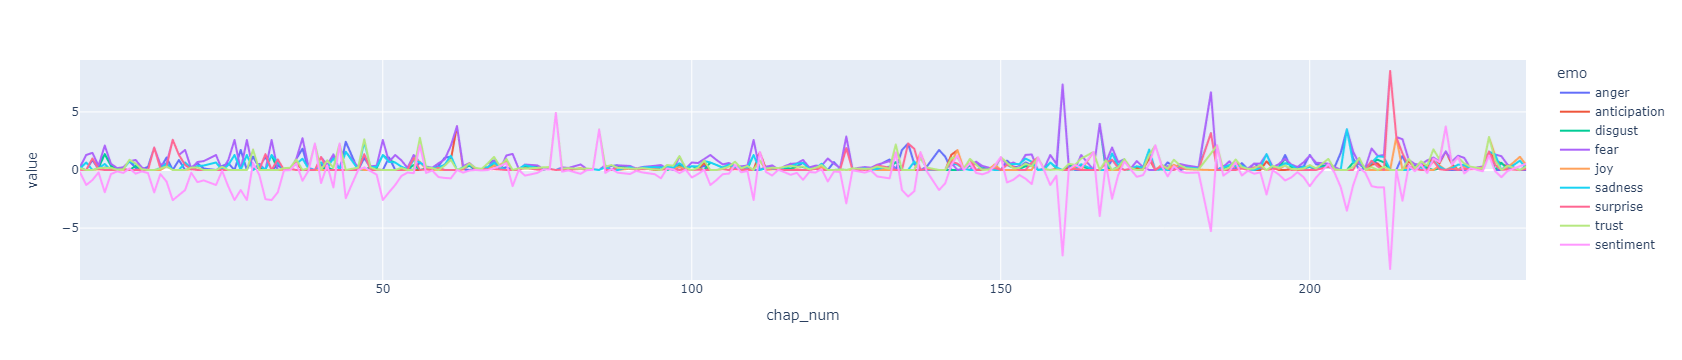
> This episode shows a relatively continuous small spikes of fear in the beginning, rather calm in the middle and then large spikes of fear as it gets to the end.

**Episode 4**:\
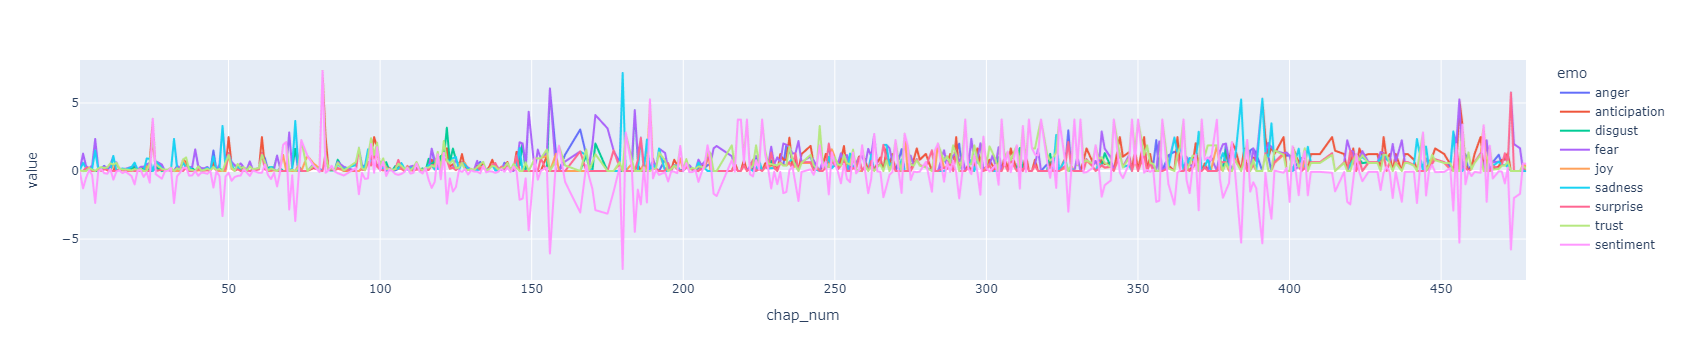
> Episode 4 shows the most often spikes during the whole movie. While it starts with various sentiments, around chapter 150 shows fear, followed by sadness. Then at the very end shows a spike in surprise, assumably the part where luke gets to know that darth vader is his father.

**Episode 5**:\
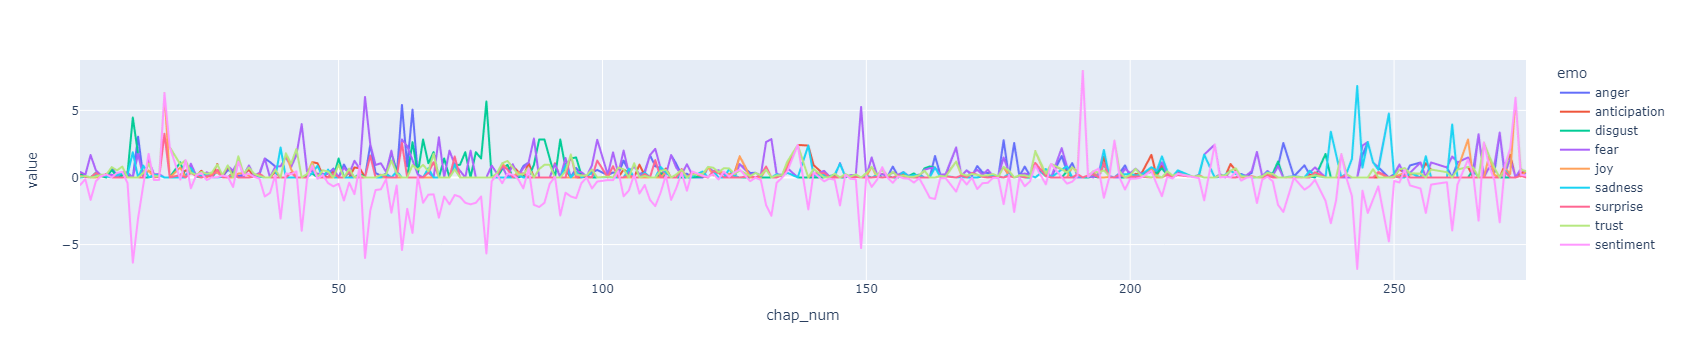
> This episode also has large sentiment spikes, including sadness, fear, anger, disgust, again fear, and ends with some sadness and fear.

**Episode 6**:\
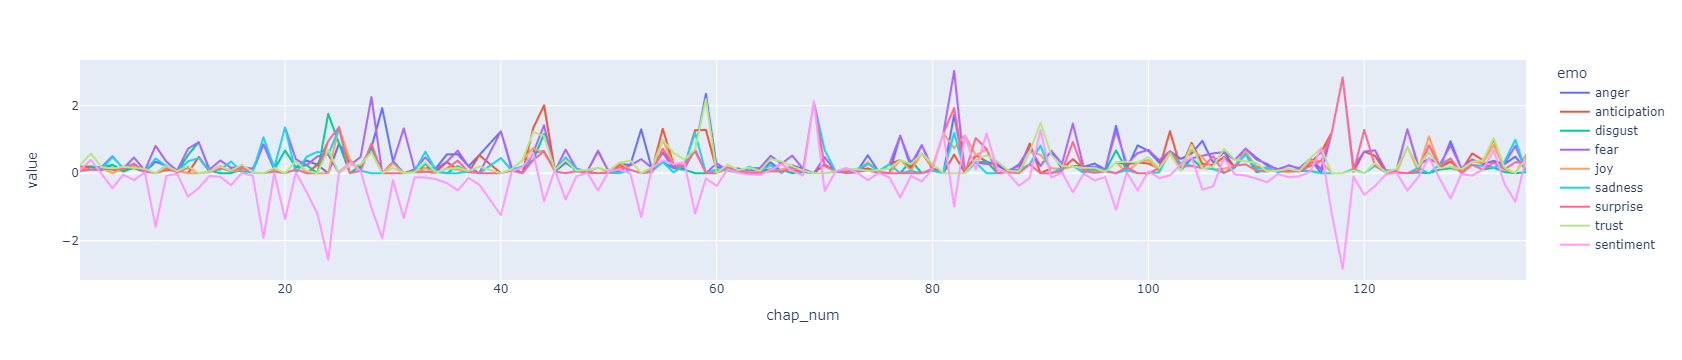
>This episode seems to have a lengthier effect when spike occurs, fear is the main sentiment in the beginning, whereas it changes into anticipation and trust. 

## VOCAB_W2V (4)

A table of word2vec features associated with terms in the VOCAB table.

- UVA Box URL: https://virginia.box.com/s/5gvd1zpvlk0wmt0xerqll12ch9oxwtp2
- GitHub URL for notebook used to create: https://github.com/kmjhyn/24Spring_ETA_Project/blob/main/J.%20W2V.ipynb
- Delimitter: `,`
- Document bag expressed in terms of OHCO levels: **Paragraphs (OHCO :3)**
- Number of features generated: **246** (452 rows × 246 columns)
- The library used to generate the embeddings: **gensim**

## Word2vec tSNE Plot (4)

Plot word embedding featues in two-dimensions using t-SNE.

Describe a cluster in the plot that captures your attention.

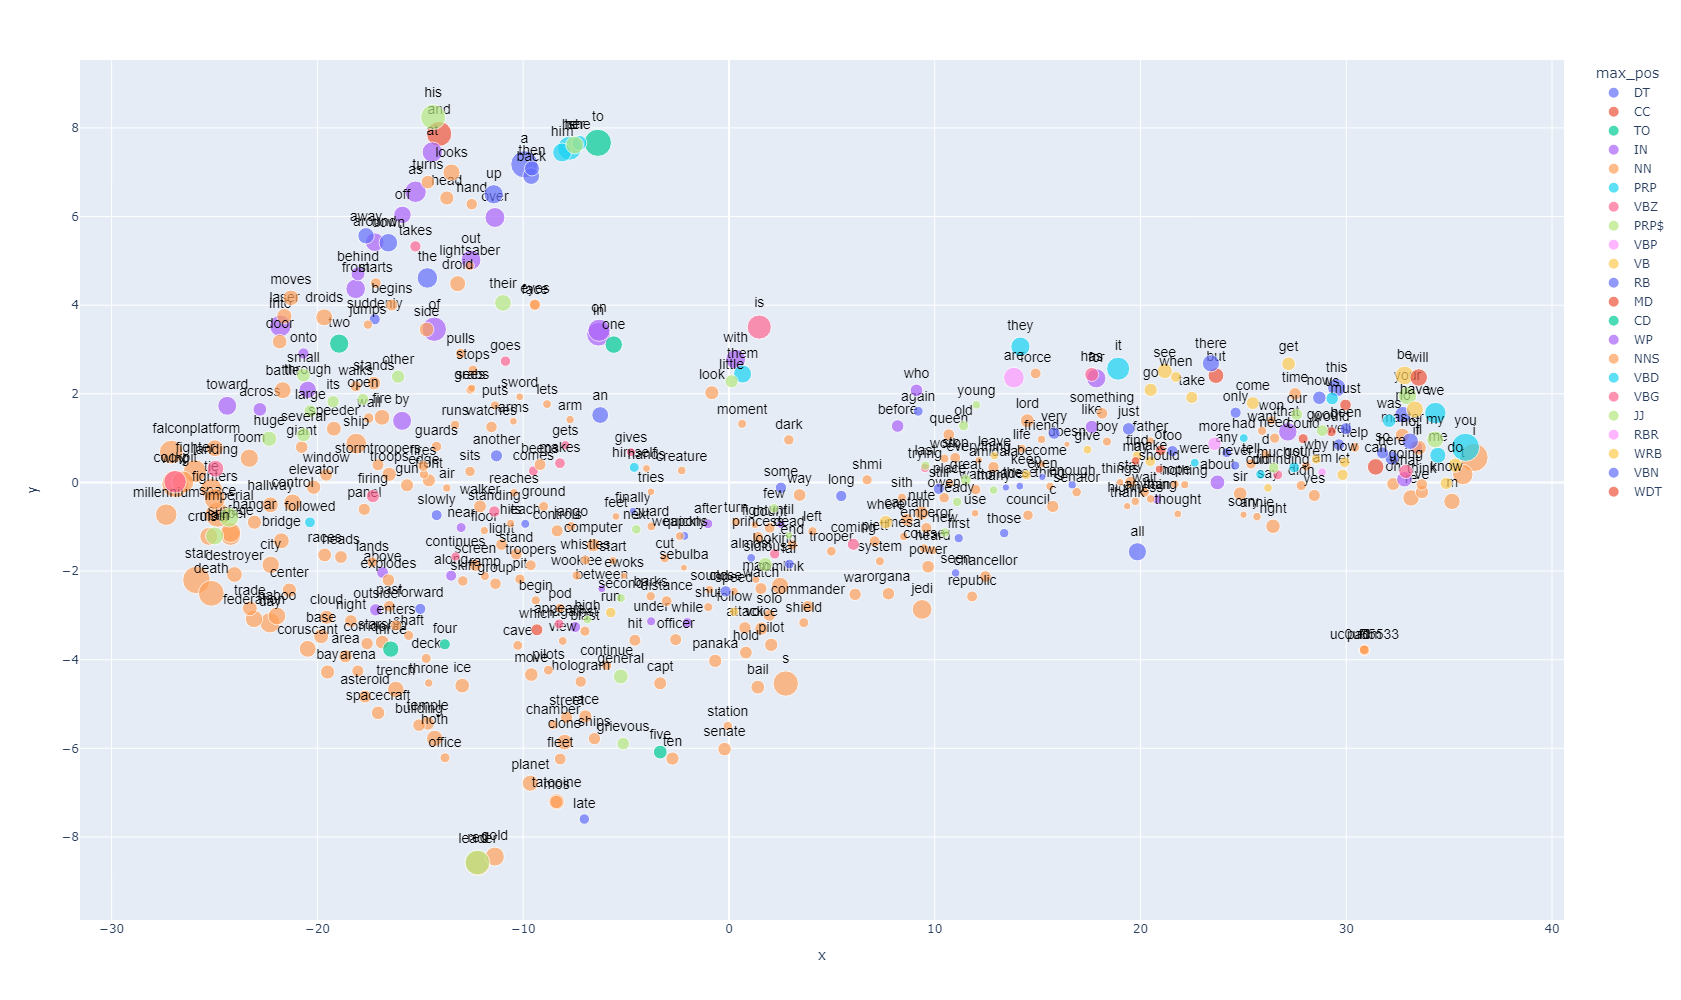

> **Cluster 1**\
> 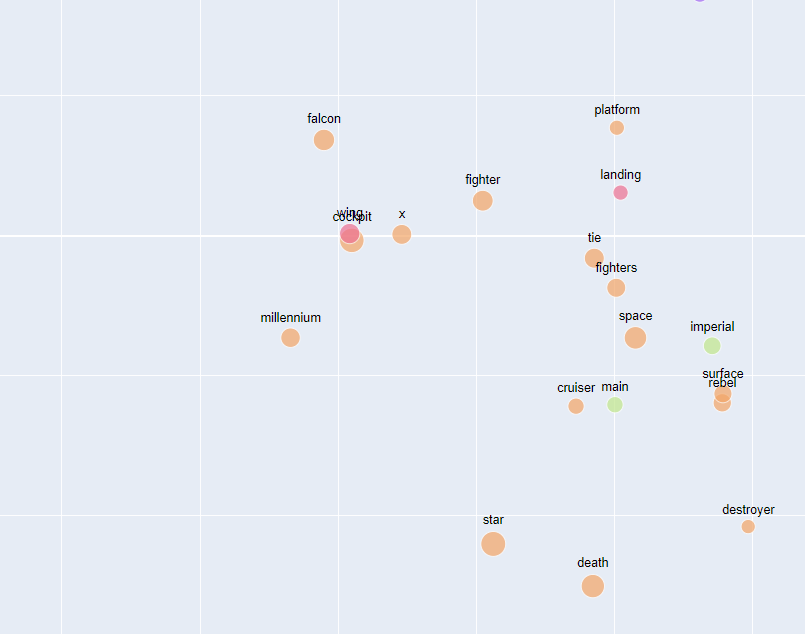\
> This cluster has the words related to spaceships and battles in starwars. It has the words such as *millenium* *falcon* and *x* *wing*, riders of these spaceships as *fighter* and *fighters*, and operating terms such as *landing*, *platform*, *cruiser*.
> 
> **Cluster 2**\
> 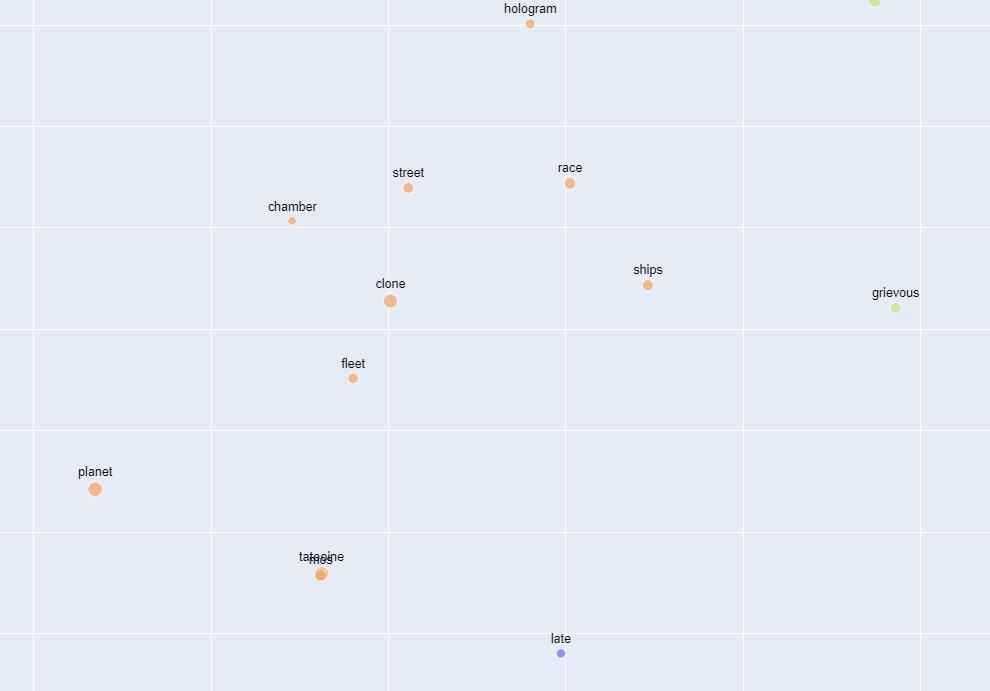\
> This cluster includes words that seems to relate more with specific episodes of the 6 movies, 'Attack of the Clones' and 'Revenge of the Sith'. Direct terms include *clone* and *grievous* (General Grievous). In addition it has some words related to spacial indications such as *planet*, *chamber*, and *fleet*.

# Riffs

Provde at least three visualizations that combine the preceding model data in interesting ways.

These should provide insight into how features in the LIB table are related. 

The nature of this relationship is left open to you -- it may be correlation, or mutual information, or something less well defined. 

In doing so, consider the following visualization types:

- Hierarchical cluster diagrams
- Heatmaps
- Scatter plots
- KDE plots
- Dispersion plots
- t-SNE plots
- etc.

In [3]:
import pandas as pd
output_dir = 'C:/Users/user/Desktop/24Spring_ETA_Project/Output'
path_prefix = 'starwars-combo'
LIB = pd.read_csv(f"{output_dir}/{path_prefix}-LIB.csv").set_index('movie_id')
LIB

,year,episode,movie_title,chap_regex,source_file_path,reviews,writer,character_len,runtime
movie_id,,,,,,,,,
1,1999,Episode I,The Phantom Menace,^\s*(INT\.|EXT\.),C:/Users/user/Desktop/24Spring_ETA_Project/Dat...,52,G.L,174327,136
2,2002,Episode II,Attack of the Clones,^\s*(INT\.|EXT\.),C:/Users/user/Desktop/24Spring_ETA_Project/Dat...,65,G.L,166248,142
3,2005,Episode III,Revenge of the Sith,^\s*\d+\s+(INT\.|EXT\.),C:/Users/user/Desktop/24Spring_ETA_Project/Dat...,79,G.L,177188,140
4,1977,Episode IV,A New Hope,^\s*(INTERIOR\:|EXTERIOR\:),C:/Users/user/Desktop/24Spring_ETA_Project/Dat...,93,G.L,204053,121
5,1980,Episode V,The Empire Strikes Back,^\s*(INT\.|EXT\.),C:/Users/user/Desktop/24Spring_ETA_Project/Dat...,95,"G.L, L.K, L.B",172933,124
6,1983,Episode VI,Return of the Jedi,^\s*\d+\s+(INT|EXT),C:/Users/user/Desktop/24Spring_ETA_Project/Dat...,83,"G.L,L.K",147118,131


## Riff 1 (5)

Characteristics of Episode 4 
-
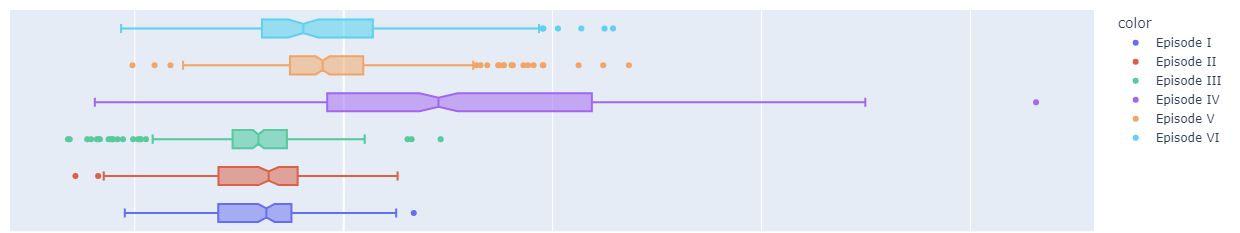\
As mentioned in the PCA related part above, episode 4 shows the largest variance compared to the other episodes. Along with my assumption that it was the first star wars movie (1977 as mentioned in the LIB table) to be presented to the public, thus had to explain all the settings, taking a look at the LIB table, the character length is over 204,053, which is significantly longer than the other episodes. Therefore, the effort of trying to explain and at the same time develop an interesting narrative of the movie with such lengthy script could have resulted in large variation on PCA.

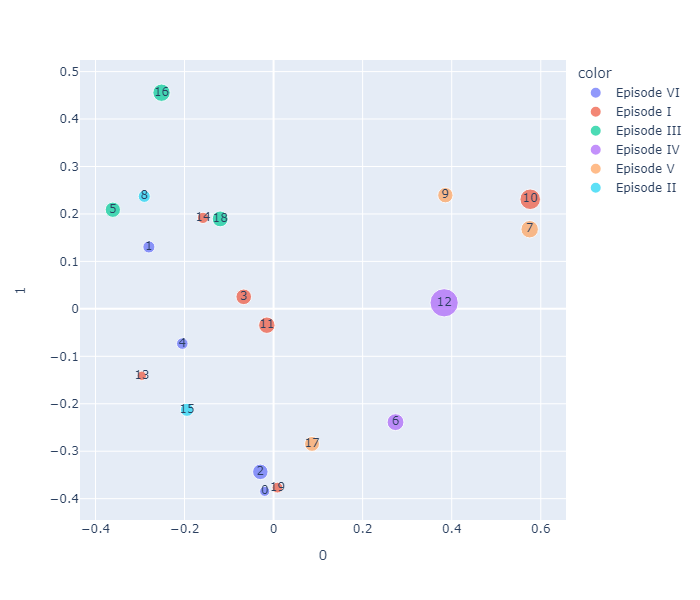\
On the other hand, as seen in LDA, Episode 4 is located in the center relative to the other episodes with less variance, formed by topics that are easily relateable to other episodes. The top words were also quite general in the Star Wars theme (star, death, space, fighters, rebel, etc.)

The characteristic of episode 4 that exhibits similar topic with LDA, but larger variance from PCA seems to be well depicting the fact that it is the first movie but not the first story of Star Wars settings. Since it has a general explanation of the Star Wars theme, these topics are dealt more broadly across the entire episodes. At the same time, the episode deals one of the most dynamic plot with battles and twist, focuses on such topics consistently in episode 4.

## Riff 2 (5)

Relation between reviews and LDA and Sentiment
-

Based on the LIB table, the reviews of episode 1 and 2 are the lowest among the 6 episodes with 52% and 65% respectively. Therefore, I wanted to take a look at the LDA visualization and Sentiment visualization to see if there is any common traits between the two compared to the other episodes.

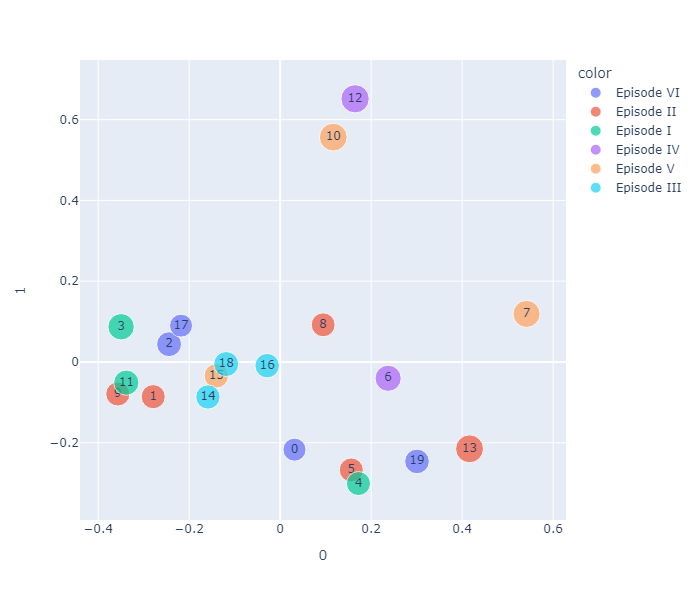\
Taking a closer look at the LDA based on paragraphs, you can tell that most of the topics for episode 1 and 2 are plotted close to each other. Especially on the left bottom, T03, T11 from episode 1 and T09, T01 from episode 2 are clustered, and on the mid-bottom part, T04 and T05 from each episodes are again clustered together.

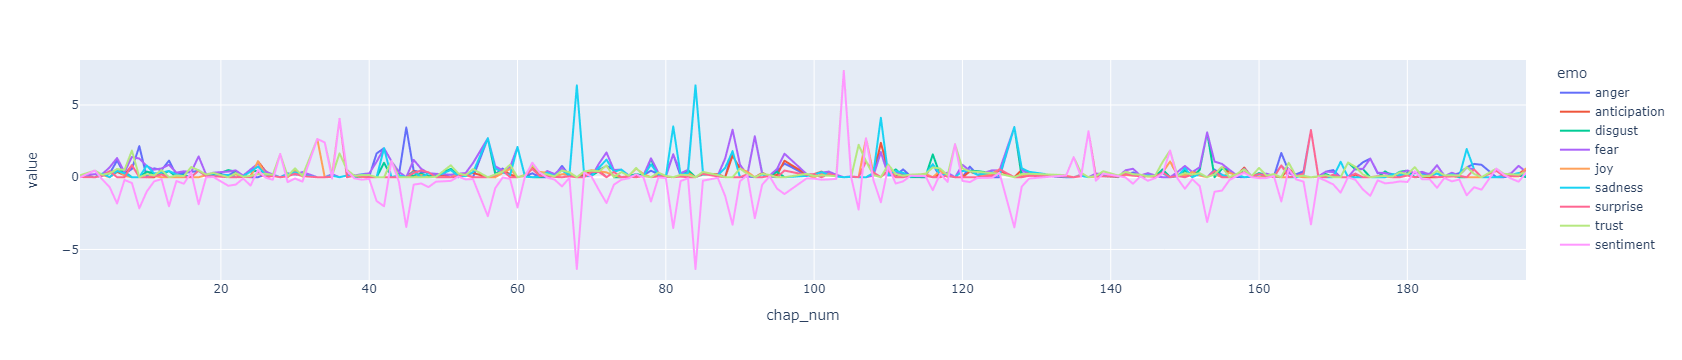
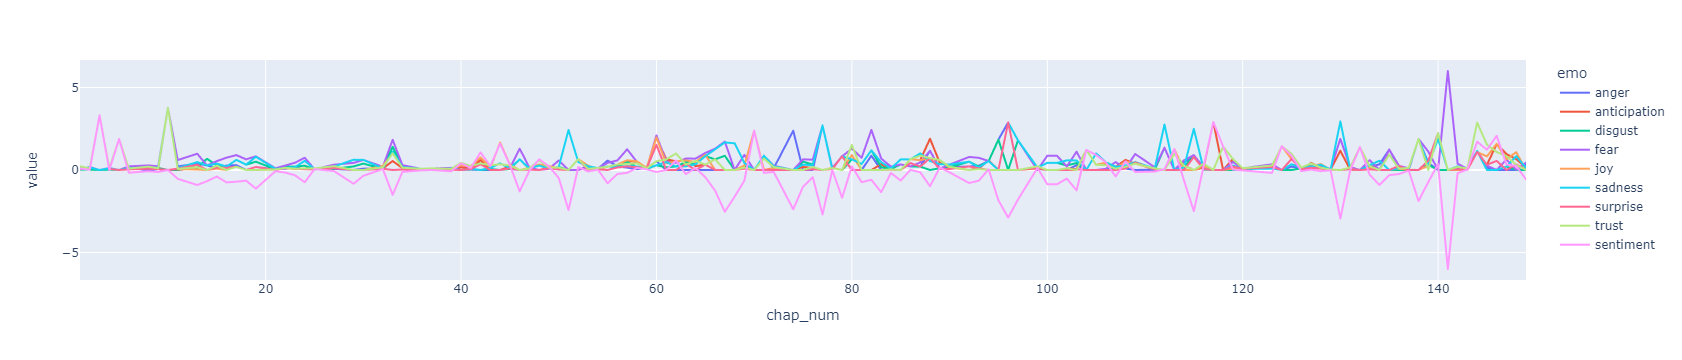\
Based on the sentiment visualization, it is clear that the sentiment spikes are in general less strong, and even if there is any, it happens in the middle of the movie or only few times at the end of the movie. This can mean that the movie's sentiment is in generally very consistent, which can lead to reduced excitement. Conidering that the episodes of 4,5, and 6 was released first, there would have been some expectations on the new movies, however, since the sentiment was not as dynamic and the topics of the first two movies were similar to each other, the reviews might have been lower than the other episodes.

## Riff 3 (5)

Clusters from TSNE and Loadings
-
**TSNE**\
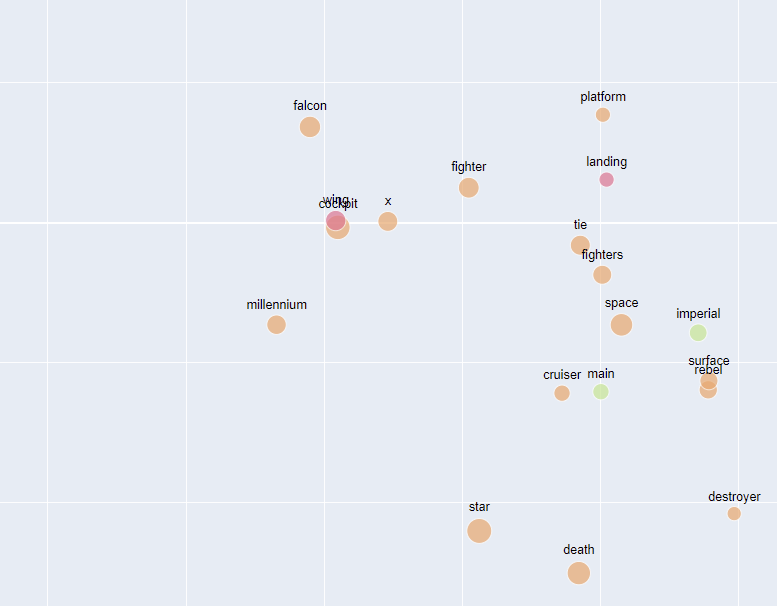\
**Loadings**\
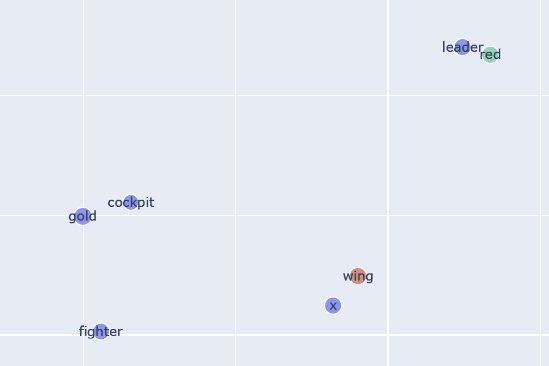

These are both parts of a certain cluster from TSNE and Loadings plot each. However, the word that stands out the most is very similar; most of them are related to spaceships and the people or operations related to those spaceships. Since Star Wars is visually very groundbreaking with spaceships that does not look like the traditional perspective, I think this is well described in the description and lines of the movie script and the models have well captured these factors. Not only pointing out the iconic millenium falcon, it also clusters x wing and its riders that are called as red leader and gold leader. These clusters seem to be more towards the rebel alliances, well showing that they are the protagonists of the movie, thus the characters and elements related to them are frequently being discussed.

# Interpretation (4)

Describe something interesting about your corpus that you discovered during the process of completing this assignment.

At a minumum, use 250 words, but you may use more. You may also add images if you'd like.

> **Model Insights** : In general, my inital assumption that most models will distinctively differentiate episodes 1-3 and episodes 4-6 turned out mostly correct. Mainly from PCA visualization, it was shown that the topics from the episode 4-6 are more varied compared to episodes 1-3, sentiment was also much varied during the entire movie for episode 4-6 than episode 1-3. Although some models such as the second two components of PCA showed that the episodes are not as different, it can be considered that the six episodes are all under the same settings and thematics of Star Wars, written mainly by the same person, therefore, has less difference than the ones I have seen from labs and homeworks. Along with the writer, the length was also generally similar between the episodes, which made it more difficult to have further variances in between the episodes.\
> **Structure of the Corpus** : When I first started working with the movie scripts, I realized that the writing style is very different from the traditional literatures. not only the structure includes various descriptions that has less meaning to the plot, but also the overall plot is mainly dealt via dialogues and visualized scenes that are conveyed to the watchers at the theater. Therefore, the corpus of movie scripts might need some additional processing methods to give additional linkage between the tokens and deleting necessary descriptions that could work as noise data.\
> **Science Fiction Genre** : In addition, since this corpus is based on a science fiction genre, there were many terms that were not captured by existing libraries. One of the most representative example was getting the POS. Most of the names of the characters were not considered as proper nouns, therefore had to be added manually if it should be filtered before running different models and analytic methodologies.\
> **Additional Exploration** : Still, it was interesting that the models capture the essence of star wars, by showing clusters related to the space ships, the lengthy yet dynamic character of the first Star Wars movie (episode 4), and supports my assumption on the bad reviews of episode 1 and 2. Furthermore, by exploring with additional models such as finding similarities as below\
> 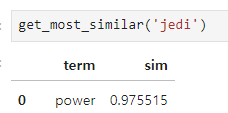\
> or finding that cosine-ward has the most distance,\
> 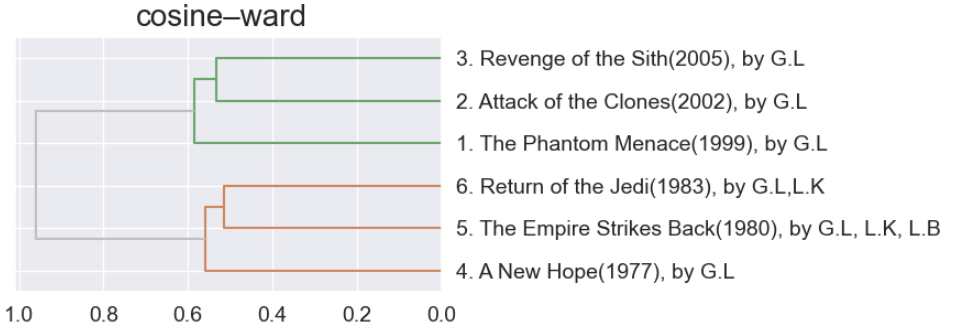\
> helped me better understand the corpus and give ideas on what to further filter out or keep to get better, meaningful insights using the models.